In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt


categ_table = pd.DataFrame(
    dict(names=['Peter', 'Jack', 'Eelin', 'John'], vals=[259, 83, 123, 162]))
categ_table = categ_table.sort_values(by='vals', ascending=False)
categ_table = categ_table.reset_index()
N = len(categ_table)
ndeep = 10
Width = 2
mydata = pd.DataFrame(columns=["x", "y", "names"])

for i in np.arange(0, N):
    print(i)
    x = categ_table['vals'][i]
    a = np.arange(1, ndeep+1, 1)
    b = np.arange(1, np.ceil(x/ndeep)+1, 1)
    X, Y = np.meshgrid(a, b)
    df_grid = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})

    category = np.repeat(categ_table['names'][i], x)

    df_grid = df_grid.loc[np.arange(0, len(category)), :]
    df_grid['x'] = df_grid['x']+i*ndeep+i*Width
    df_grid['names'] = category
    mydata = mydata.append(df_grid)

mydata['names'] = pd.Categorical(mydata['names'], categories=categ_table['names'], ordered=True)
mydata['x'] = mydata['x'].astype(float)
x_breaks = (np.arange(0, N)+1)*ndeep+np.arange(0, N)*Width-ndeep/2
x_label = categ_table.names

mydata_label = pd.DataFrame(dict(y=np.ceil(
    categ_table['vals']) / ndeep+2, x=x_breaks, label=categ_table['vals']))

breaks = np.arange(0, 30, 10)
mydata


0
1
2
3


,x,y,names
0,1.0,1.0,Peter
1,2.0,1.0,Peter
2,3.0,1.0,Peter
3,4.0,1.0,Peter
4,5.0,1.0,Peter
...,...,...,...
78,45.0,8.0,Jack
79,46.0,8.0,Jack
80,37.0,9.0,Jack
81,38.0,9.0,Jack


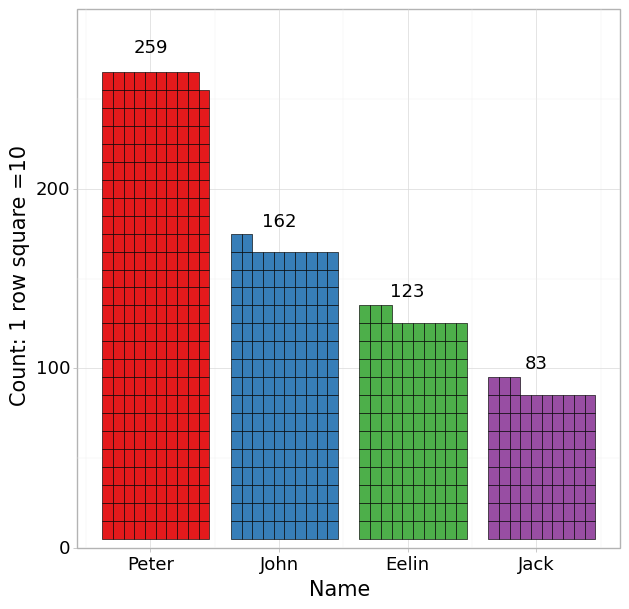

<ggplot: (157617430772)>


In [2]:
base_plot = (ggplot() +
             geom_tile(aes(x='x', y='y', fill='names'), mydata, color="black", size=0.25) +
             geom_text(aes(x='x', y='y', label='label'), data=mydata_label, size=13) +
             scale_fill_brewer(type='qual', palette="Set1") +
             xlab("Name") +
             ylab("Count: 1 row square =" + str(ndeep)) +
             scale_x_continuous(breaks=x_breaks, labels=x_label) +
             scale_y_continuous(breaks=breaks, labels=breaks*ndeep, limits=(0, 30), expand=(0, 0)) +
             theme_light() +
             theme(
    axis_title=element_text(size=15, face="plain", color="black"),
    axis_text=element_text(size=13, face="plain", color="black"),
    legend_position="none",
    figure_size=(7, 7),
    dpi=100))
print(base_plot)


In [ ]:
base_plot = (ggplot() +
             # The color of the lines between tiles
             geom_point(aes(x='x', y='y', fill='names'), mydata, shape='o', color="k", size=4, stroke=0.2) +
             # The color of the lines between tiles
             geom_text(aes(x='x', y='y', label='label'), data=mydata_label, size=13) +
             scale_fill_brewer(type='qual', palette="Set1") +
             xlab("Name") +
             ylab("Count: 1 row square =" + str(ndeep)) +
             # coord_fixed(ratio = 1)+
             scale_x_continuous(breaks=x_breaks, labels=x_label) +
             scale_y_continuous(breaks=breaks, labels=breaks*ndeep, limits=(0, 30), expand=(0, 0)) +
             theme_light() +
             theme(  # panel.border = element_rect(fill=NA,size = 2),
    axis_title=element_text(size=15, face="plain", color="black"),
    axis_text=element_text(size=13, face="plain", color="black"),
    legend_position="none",
    # aspect_ratio =1,
    figure_size=(7, 7),
    dpi=100
)
)
print(base_plot)
